In [3]:
from langchain.chat_models import init_chat_model
from langgraph.prebuilt import create_react_agent
from langchain_tavily import TavilySearch
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import os

In [4]:
#Loading the API Keys to be used
os.environ["TAVILY_API_KEY"] = ''
os.environ['OPENAI_API_KEY'] = ''

In [5]:
#Select the model to use in this case gpt-4.1
model = init_chat_model("openai:gpt-4.1", temperature=0)

In [6]:
#Tavily will be our search tool
tool = TavilySearch(
    max_results=2,
    topic="general"
)

In [7]:
#Output format we want to get from the model in this case will be a result in string format and price in float format
class ResponseFormat(BaseModel):
    """Response format for the agent."""
    result: str
    price: float

In [8]:
#Most simplest way to create an agent
#Using the create_react_agent specifying the model to use, tools and the response format
agent = create_react_agent(
    model,
    tools=[tool],
    response_format=ResponseFormat,
)

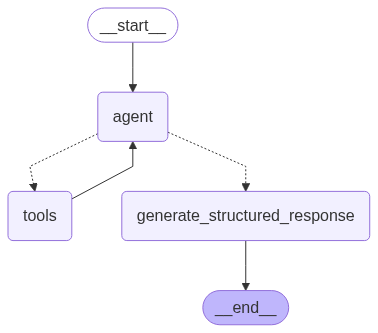

In [9]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [10]:
response = agent.invoke({"messages": [{"role": "user", "content": "What is the Bitcoin price at this moment?"}]})

In [11]:
response

{'messages': [HumanMessage(content='What is the Bitcoin price at this moment?', additional_kwargs={}, response_metadata={}, id='e87b4a5c-e43f-4dc3-94f4-bad2995bb62a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_05buyUiflEa2BXNkAoNHRkPU', 'function': {'arguments': '{"query":"current Bitcoin price","search_depth":"basic"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 776, 'total_tokens': 799, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-BomATij2cacoNRws4gn2ZcbA48zUt', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d4ee773f-60c5-4278-84a6-a67e935d91e2-0', tool_calls=[{'name': 't

In [12]:
response['structured_response']

ResponseFormat(result='The current price of Bitcoin is approximately $106,539.31 USD. Please note that cryptocurrency prices are highly volatile and can change rapidly.', price=106539.31)